In [2]:
#Libraries 
#eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#split the datatset
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import LabelEncoder

# model
from sklearn.linear_model import LinearRegression

#pickle
import pickle

#model testing
from sklearn.metrics import mean_squared_error, r2_score

#time stamp
import time 
print("last update", time.asctime())

last update Fri Sep 26 17:19:42 2025


# House Price prediction (Machine Learning/Recognition)

![Machine Learning](assets/ml.jpeg)

# 1. Formulate the Problem

## Problem Definition
We will build a supervised regression model to predict house **Price** using features:
`Bedrooms`, `Bathrooms`, `Area_sqft`, `Location_Score`, `Age_years`.
## Problem Type: 
This is a supervised machine learning regression problem.
## Objective: 
Predict the house price (target variable) using other features (like number of rooms, location, area, etc.).
## Inputs (features): 
Characteristics of the house (independent variables).
## Output (label): 
House Price (dependent variable).
## Formulated problem is:
Given various features of houses (like size, bedrooms, location, etc.), build a predictive model to estimate the house price.

# 2.Collect as much data as possible

Since you already provided a dataset with 10,000 records, we need to:

1. Inspect the dataset.

2. Check how many features we have (columns).

3. See if there are missing values.

4. Understand distributions (statistics, histograms, correlations).

In [3]:
#read the dataset
df = pd.read_csv('dataset/house_price_dataset_10000.csv')
df.head(10)

,Bedrooms,Bathrooms,Area_sqft,Location_Score,Age_years,Price
0,2,2,1457,8,9,547932
1,2,3,2202,1,8,535773
2,2,3,3304,7,44,794521
3,2,1,1568,10,42,542427
4,4,2,2100,3,41,603995
5,1,3,1705,10,23,573200
6,3,1,2240,10,4,725578
7,5,3,2316,9,34,821537
8,3,3,3088,5,3,795965
9,3,3,1216,3,34,455198


# 3. Prepare and Analyis data

In [4]:
#Shape
df.shape

(10000, 6)

In [5]:
#describe
df.describe()

,Bedrooms,Bathrooms,Area_sqft,Location_Score,Age_years,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,3.007000,2.002300,2323.130500,5.585900,24.528000,6.462246e+05
std,1.420828,0.813733,979.546598,2.855142,14.462397,1.749822e+05
min,1.000000,1.000000,600.000000,1.000000,0.000000,1.489400e+05
25%,2.000000,1.000000,1489.000000,3.000000,12.000000,5.158505e+05
50%,3.000000,2.000000,2327.000000,6.000000,25.000000,6.479580e+05
75%,4.000000,3.000000,3177.000000,8.000000,37.000000,7.777868e+05
max,5.000000,3.000000,3999.000000,10.000000,49.000000,1.118126e+06


In [6]:
# check info about dataset
df.info

<bound method DataFrame.info of       Bedrooms  Bathrooms  Area_sqft  Location_Score  Age_years   Price
0            2          2       1457               8          9  547932
1            2          3       2202               1          8  535773
2            2          3       3304               7         44  794521
3            2          1       1568              10         42  542427
4            4          2       2100               3         41  603995
...        ...        ...        ...             ...        ...     ...
9995         4          1       2109               7         27  665471
9996         5          3       2923              10         16  980004
9997         3          1       1032              10         21  526058
9998         2          3       1808               4         34  516843
9999         4          2       3280               1         48  710758

[10000 rows x 6 columns]>

In [7]:
# check null values
df.isna().sum()

Bedrooms          0
Bathrooms         0
Area_sqft         0
Location_Score    0
Age_years         0
Price             0
dtype: int64

In [8]:
# age unique values
df['Age_years'].value_counts()

29    229
3     227
41    225
35    225
40    221
25    220
5     220
33    218
22    217
38    217
27    216
43    212
7     211
46    209
16    206
19    205
6     205
9     205
44    204
2     203
28    202
21    202
0     202
49    201
1     198
20    196
42    196
47    196
26    195
17    195
15    194
23    193
30    192
34    191
4     191
37    191
12    190
8     190
13    186
39    186
10    186
11    186
36    185
45    184
31    183
32    182
48    180
24    179
14    179
18    174
Name: Age_years, dtype: int64

In [9]:
# Location_Score 
df['Location_Score'].value_counts() 

10    1045
6     1041
5     1033
7     1027
9     1019
3     1011
8      996
4      962
1      943
2      923
Name: Location_Score, dtype: int64

In [10]:
# Area_sqft
df['Area_sqft'].value_counts() 

3438    13
1556     9
768      9
2068     9
2890     9
        ..
2421     1
3715     1
3646     1
3897     1
1808     1
Name: Area_sqft, Length: 3209, dtype: int64

In [11]:
#Bathrooms
df['Bathrooms'].value_counts() 

2    3379
3    3322
1    3299
Name: Bathrooms, dtype: int64

In [12]:
# Bedrooms
df['Bedrooms'].value_counts() 

5    2043
2    2015
1    2000
4    1999
3    1943
Name: Bedrooms, dtype: int64

In [13]:
# Price
df['Price'].value_counts() 

839162    3
563973    2
762174    2
506766    2
641179    2
         ..
487451    1
884656    1
912822    1
890138    1
710758    1
Name: Price, Length: 9902, dtype: int64

## Visualizaion
We'll examine distributions, correlations and relationships with Price.

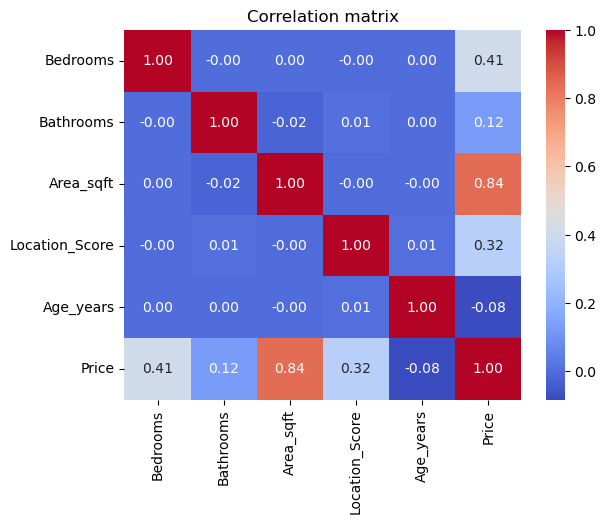

In [14]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

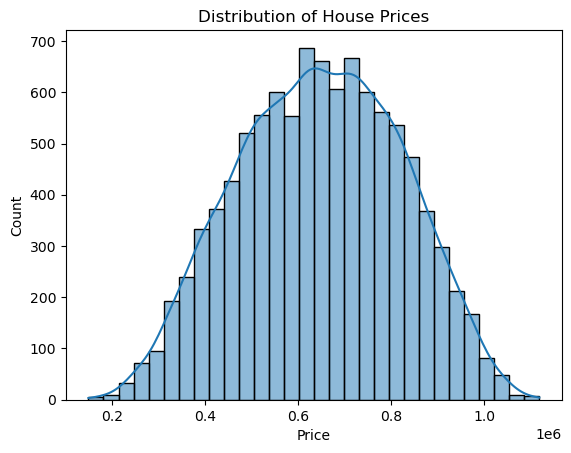

In [15]:
# Distribution of the target (Price)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

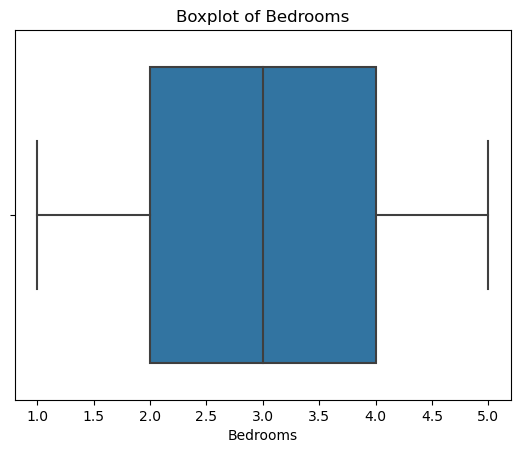

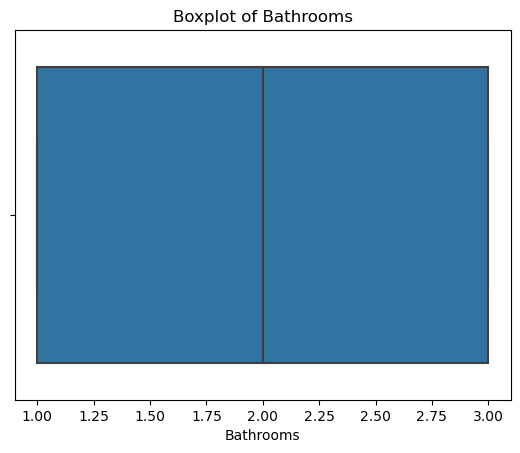

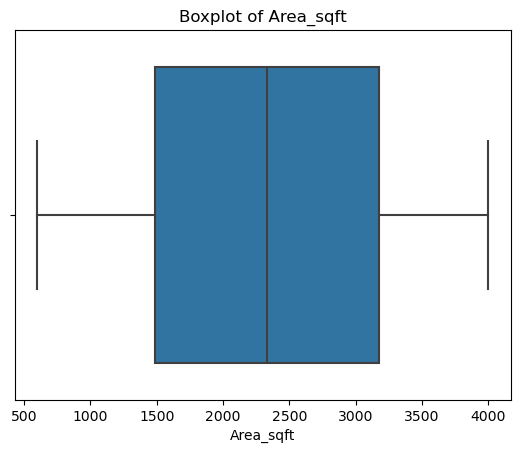

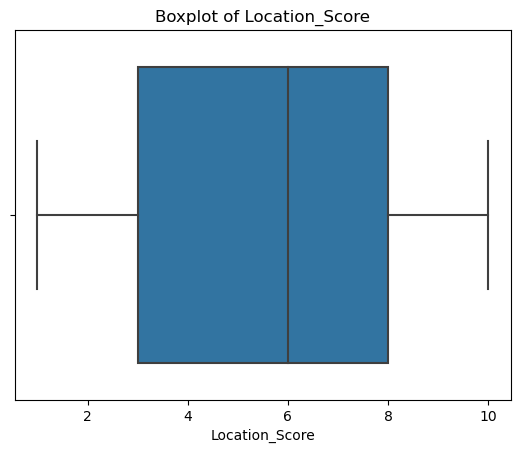

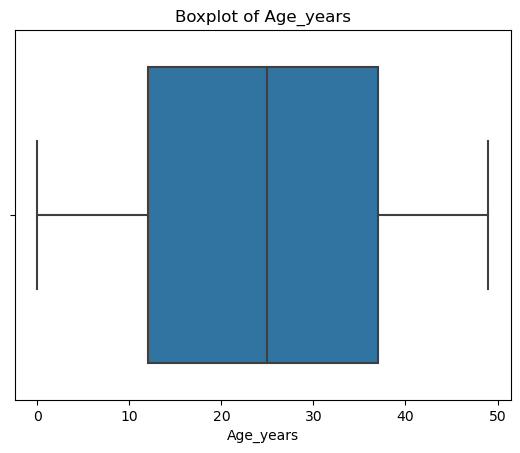

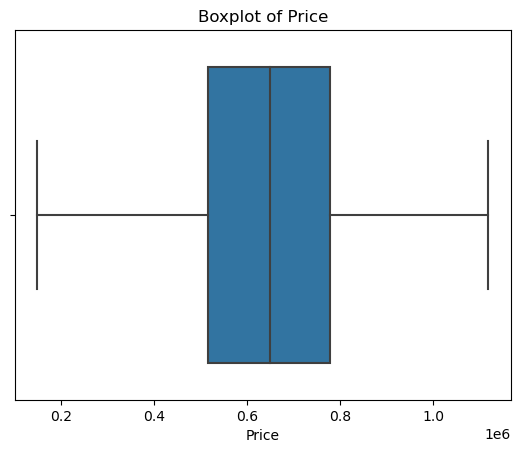

In [16]:
# Boxplots to inspect outliers for numeric features
numeric_cols = ['Bedrooms','Bathrooms','Area_sqft','Location_Score','Age_years','Price']
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

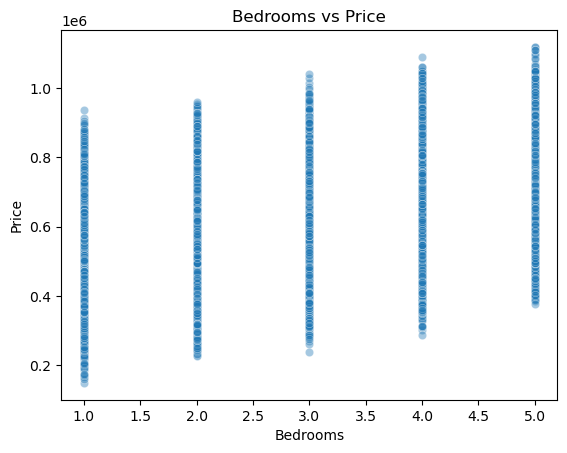

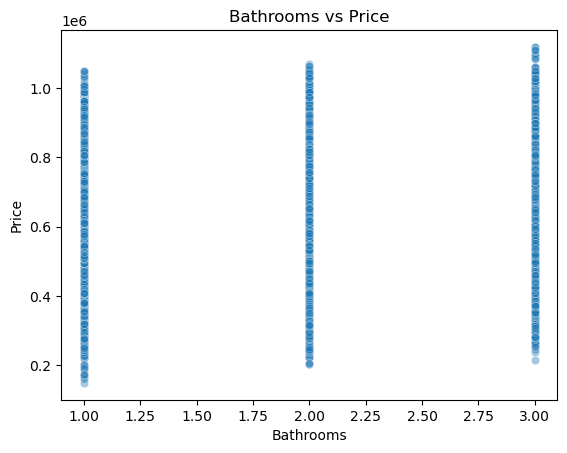

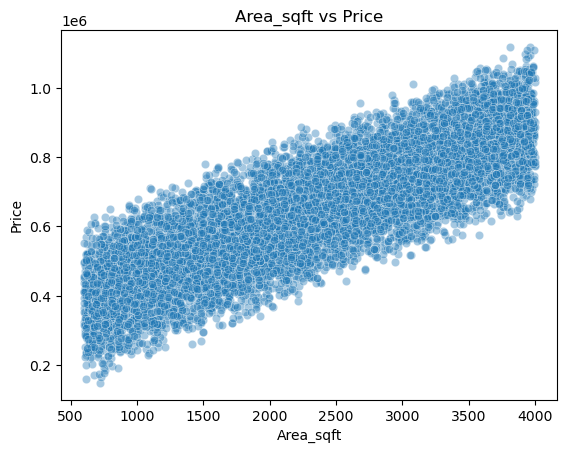

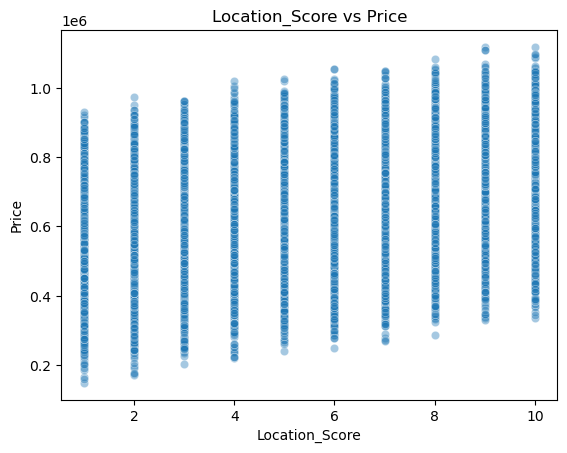

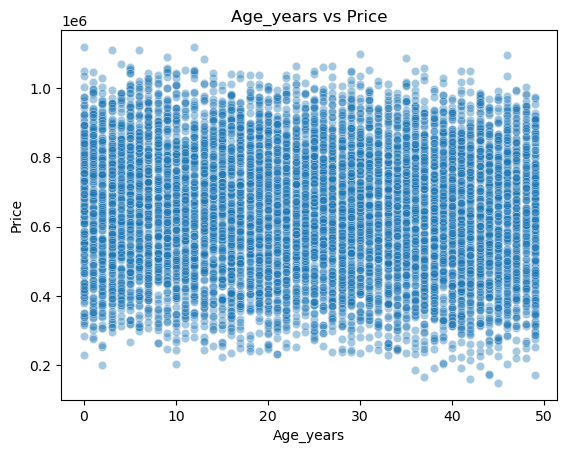

In [17]:
# Scatter plots: features vs Price
features = ['Bedrooms','Bathrooms','Area_sqft','Location_Score','Age_years']
for f in features:
    plt.figure()
    sns.scatterplot(x=df[f], y=df['Price'], alpha=0.4)
    plt.title(f'{f} vs Price')
    plt.xlabel(f)
    plt.ylabel('Price')
    plt.show()


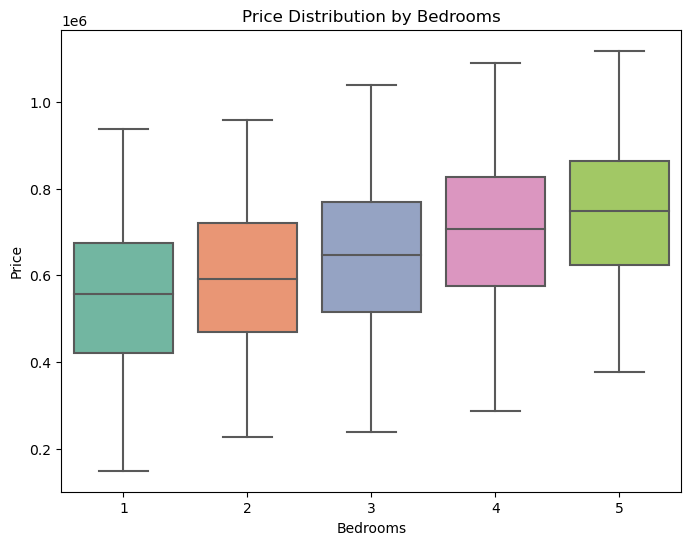

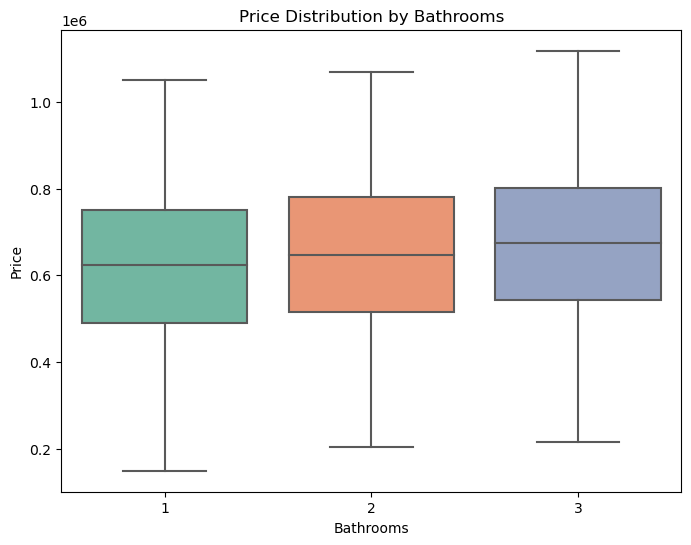

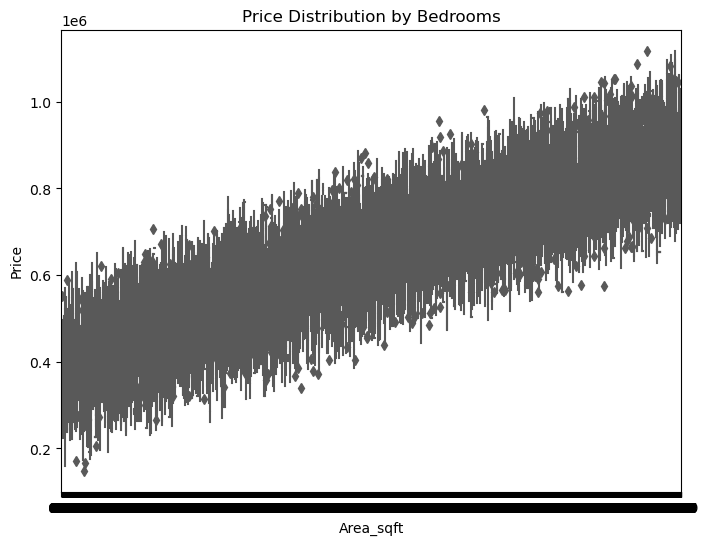

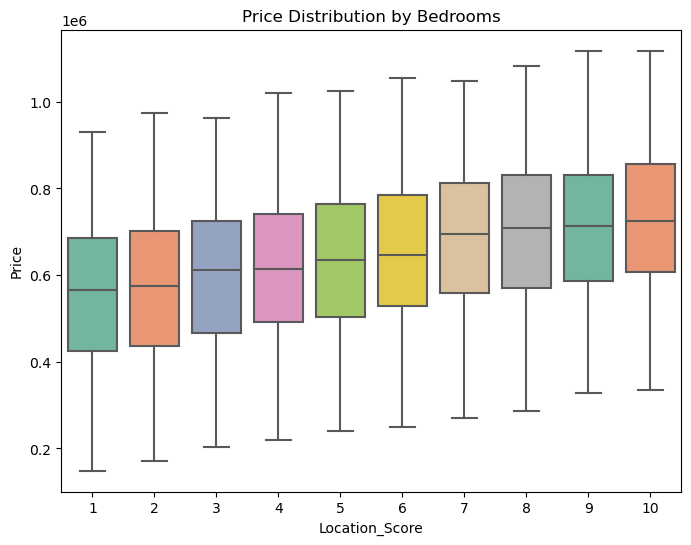

In [18]:
## Boxplot of price by bedrooms
plt.figure(figsize=(8,6))
sns.boxplot(x="Bedrooms", y="Price", data=df, palette="Set2")

plt.title("Price Distribution by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

## Boxplot of price by bathrooms
plt.figure(figsize=(8,6))
sns.boxplot(x="Bathrooms", y="Price", data=df, palette="Set2")

plt.title("Price Distribution by Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()
 
## Boxplot of price by area sqft
plt.figure(figsize=(8,6))
sns.boxplot(x="Area_sqft", y="Price", data=df, palette="Set2")

plt.title("Price Distribution by Bedrooms")
plt.xlabel("Area_sqft")
plt.ylabel("Price")
plt.show()

## Boxplot of price by location score
plt.figure(figsize=(8,6))
sns.boxplot(x="Location_Score", y="Price", data=df, palette="Set2")

plt.title("Price Distribution by Bedrooms")
plt.xlabel("Location_Score")
plt.ylabel("Price")
plt.show()




# Report

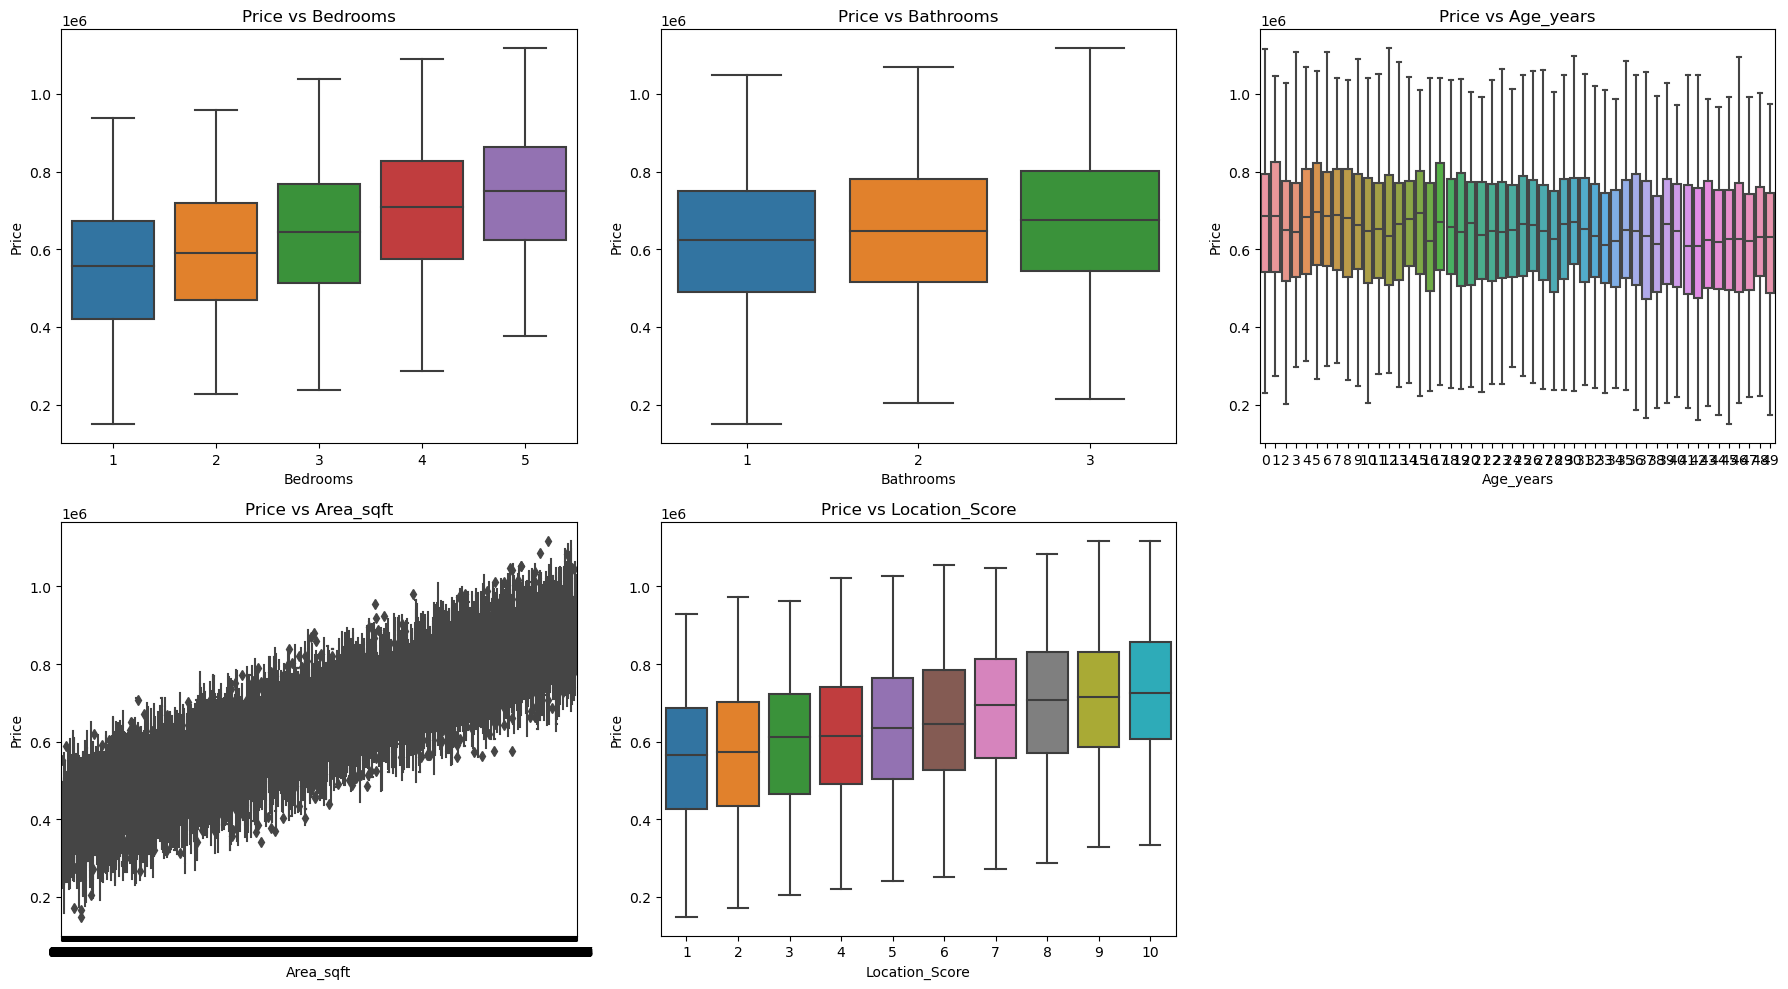

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features for categorical-style grouping
features = ["Bedrooms", "Bathrooms", "Age_years", "Area_sqft", "Location_Score"]

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x=df[col], y=df["Price"], ax=axes[i])
    axes[i].set_title(f"Price vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Main Title
fig.suptitle("Dataset Report: House Price Analysis", fontsize=18, fontweight="bold", y=1.05)

# Footer: Developer credit
fig.text(0.5, -0.05, "Dev by Rabia Riaz", ha="center", fontsize=12, color="gray")
# Dataset summary at bottom
summary = f"""
Dataset Summary:
- Total Records: {len(df)}
- Bedrooms: {df['Bedrooms'].min()} to {df['Bedrooms'].max()}
- Bathrooms: {df['Bathrooms'].min()} cm to {df['Bathrooms'].max()} cm
- Age_years: {df['Age_years'].min()} to {df['Age_years'].max()}
- Area_sqft: {df['Area_sqft'].min()} to {df['Area_sqft'].max()}
- Location_Score: {df['Location_Score'].min()} to {df['Location_Score'].max()}
- Price Distribution: {df['Price'].value_counts().to_dict()}
"""
fig.text(0.5, -0.15, summary, ha="center", va="top", fontsize=10, family="monospace")

plt.tight_layout()
plt.savefig("assets/dataset_report.png", dpi=300, bbox_inches="tight")
plt.show()


# 4. Select the correct algorithm
I am going to use `linear regression` for this project

<img src="assets/ml_map.svg" alt="ML Map" width="500"/>

# 5.Train the Machine Learning Model

In [21]:
df.head(2)

,Bedrooms,Bathrooms,Area_sqft,Location_Score,Age_years,Price
0,2,2,1457,8,9,547932
1,2,3,2202,1,8,535773


In [22]:
df.head()

,Bedrooms,Bathrooms,Area_sqft,Location_Score,Age_years,Price
0,2,2,1457,8,9,547932
1,2,3,2202,1,8,535773
2,2,3,3304,7,44,794521
3,2,1,1568,10,42,542427
4,4,2,2100,3,41,603995


## Train Test Split

In [23]:
#Features (X) and Target (y)
X = df[["Bedrooms", "Bathrooms", "Area_sqft","Age_years","Location_Score"]]
y = df["Price"]

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training

In [25]:
# Train linear Regression
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

# 6. Test the Model in practice

In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
y_test, y_pred

(2091    559739
 2327    690995
 6648    575360
 5892    456818
 8824    833343
          ...  
 2469    512011
 1731    600063
 9451    954965
 6700    846731
 6326    929272
 Name: Price, Length: 2000, dtype: int64,
 array([571383.96959586, 700010.77661753, 581176.25724021, ...,
        964392.8072865 , 864242.37200745, 948790.35483145]))

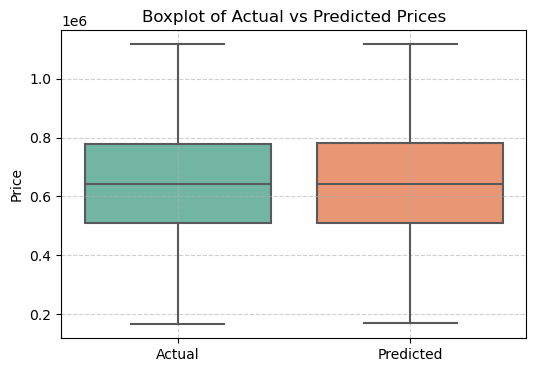

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine into one DataFrame for easy plotting
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Melt into long format for seaborn
results_melted = results.melt(var_name="Type", value_name="Price")

# Plot boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="Type", y="Price", data=results_melted, palette="Set2")

plt.title("Boxplot of Actual vs Predicted Prices")
plt.xlabel("")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("assets/boxplot_actual_predicted.png")
plt.show()


# 7.Evaluation

In [32]:
print("Coefficients:", model.coef_) 
print("Intercept:", model.intercept_)

Coefficients: [49964.53292805 30101.74307175   150.01602672 -1019.64465138
 20016.00378841]
Intercept: 391.71605258376803


In [33]:
print("R^2 Score:", r2_score(y_test, y_pred)) 

R^2 Score: 0.9956400671646065


In [34]:
print("RMSE:", mean_squared_error(y_test, y_pred))

RMSE: 130309728.45618455


## Save Model

In [35]:
# --- Save model ---
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Test All Models

In [36]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []

# Train & evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, rmse))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

print(results_df)

# Select best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

               Model  R2_Score          RMSE
1              Ridge  0.995640  1.303083e+08
2              Lasso  0.995640  1.303095e+08
0  Linear Regression  0.995640  1.303097e+08
5  Gradient Boosting  0.993553  1.926882e+08
4      Random Forest  0.990098  2.959640e+08
3      Decision Tree  0.974402  7.650645e+08
6                SVR  0.010217  2.958266e+10

Best Model: Ridge


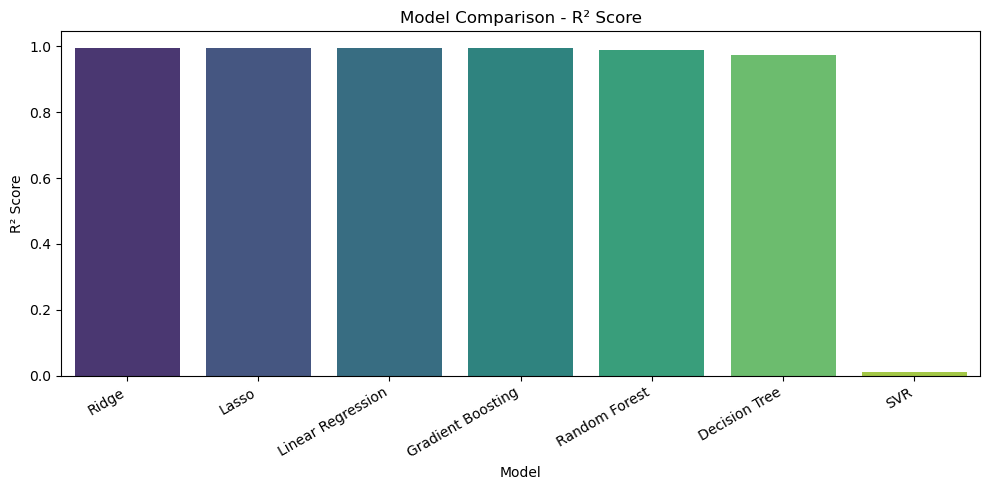

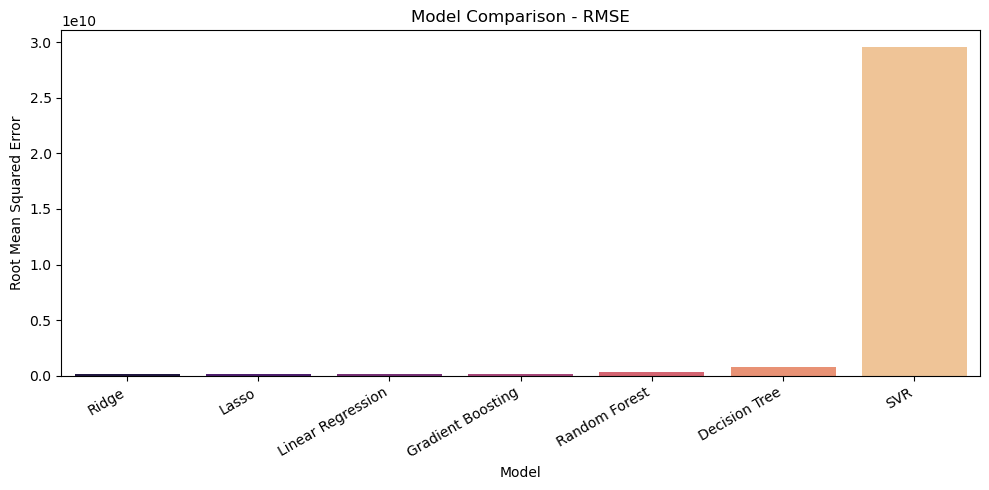

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot of R² Scores
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2_Score", data=results_df, palette="viridis")
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

# Barplot of RMSE
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="magma")
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.tight_layout()
plt.show()